# Machine Learning Final
## This data set contains the star reviews of diffrent variants of the Amazon Alexa. I had two general questions when looking at the data. My first question was is the distrabution of ratings and my second questions was how the ratings differ fom variation.

## Data Aquisition

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import seaborn as sns

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/niteen11/data301_predictive_analytics_machine_learning/main/data/amazon_alexa.tsv', delimiter = "\t")

In [5]:
df.head(5)

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [6]:
df.isnull().sum()

rating              0
date                0
variation           0
verified_reviews    0
feedback            0
dtype: int64

In [7]:
df.shape

(3150, 5)

# Exploratory data analysis

In [8]:
best_rating = [df[df['rating'] > 3]]

In [9]:
pd.set_option('display.max_columns', None)

In [10]:
pd.set_option('max_colwidth', None)

In [11]:
best_rating

[      rating       date         variation  \
 0          5  31-Jul-18  Charcoal Fabric    
 1          5  31-Jul-18  Charcoal Fabric    
 2          4  31-Jul-18    Walnut Finish    
 3          5  31-Jul-18  Charcoal Fabric    
 4          5  31-Jul-18  Charcoal Fabric    
 ...      ...        ...               ...   
 3145       5  30-Jul-18        Black  Dot   
 3146       5  30-Jul-18        Black  Dot   
 3147       5  30-Jul-18        Black  Dot   
 3148       5  30-Jul-18        White  Dot   
 3149       4  29-Jul-18        Black  Dot   
 
                                                                                                                                                                                                                                                                                                                                                                                                                                                verified_revie

In [12]:
worst_reviews = [df[df['rating'] < 2]]

In [13]:
worst_reviews

[      rating       date          variation  \
 141        1  30-Jul-18   Charcoal Fabric    
 162        1  30-Jul-18  Sandstone Fabric    
 341        1  28-Jul-18   Charcoal Fabric    
 350        1  31-Jul-18              Black   
 361        1  29-Jul-18              Black   
 ...      ...        ...                ...   
 3024       1  30-Jul-18         Black  Dot   
 3047       1  30-Jul-18         Black  Dot   
 3048       1  30-Jul-18         White  Dot   
 3091       1  30-Jul-18         Black  Dot   
 3096       1  30-Jul-18         White  Dot   
 
                                                                                                                                                                                                                                                                                                                                                                                                                                                  

In [14]:
from itertools import count

In [15]:
df['rating'].value_counts(normalize=True) * 100

5    72.571429
4    14.444444
1     5.111111
3     4.825397
2     3.047619
Name: rating, dtype: float64

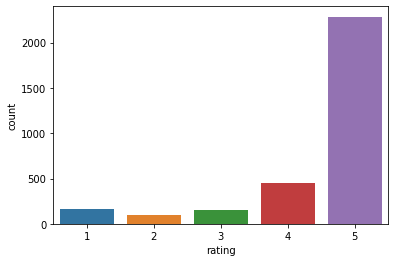

In [16]:

ax = sns.countplot(x="rating", data=df)

In [17]:
df.drop(['date'], axis=1, inplace = True)
# the highest rating is 5 followed by 4 and 1


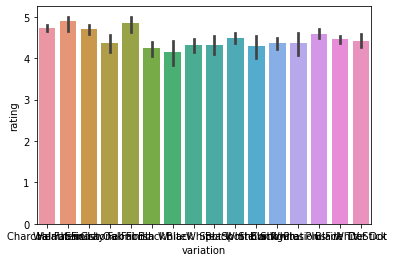

In [66]:
sns.barplot(x = 'variation', y= 'rating', data= df)


# Machine Learning model

## SVM model

In [19]:
from sklearn.feature_extraction.text import CountVectorizer

In [20]:
cv = CountVectorizer

In [21]:
import string

In [22]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [23]:
from nltk.corpus import stopwords

In [24]:
from nltk.corpus.reader import reviews

In [25]:
df.iloc[5]

rating                                                                                                                                                                                         5
variation                                                                                                                                                                   Heather Gray Fabric 
verified_reviews    I received the echo as a gift. I needed another Bluetooth or something to play music easily accessible, and found this smart speaker. Can’t wait to see what else it can do.
feedback                                                                                                                                                                                       1
Name: 5, dtype: object

In [26]:
len(df['verified_reviews'][5])

172

In [27]:
(df['verified_reviews'][5])

'I received the echo as a gift. I needed another Bluetooth or something to play music easily accessible, and found this smart speaker. Can’t wait to see what else it can do.'

In [28]:
max(df['verified_reviews'].apply(len))

2851

In [29]:
review_x = df[df['verified_reviews'].apply(len)==2851]

In [30]:
review_x

,rating,variation,verified_reviews,feedback
2016,5,Black Plus,"Incredible piece of technology.I have this right center of my living room on an island kitchen counter. The mic and speaker goes in every direction and the quality of the sound is quite good. I connected the Echo via Bluetooth to my Sony soundbar on my TV but find the Echo placement and 360 sound more appealing. It's no audiophile equipment but there is good range and decent bass. The sound is more than adequate for any indoor entertaining and loud enough to bother neighbors in my building. The knob on the top works great for adjusting volume. This is my first Echo device and I would imagine having to press volume buttons (on the Echo 2) a large inconvenience and not as precise. For that alone I would recommend this over the regular Echo (2nd generation).The piece looks quality and is quite sturdy with some weight on it. The rubber material on the bottom has a good grip on the granite counter-- my cat can even rub her scent on it without tipping it over.This order came with a free Philips Hue Bulb which I installed along with an extra one I bought. I put the 2 bulbs into my living room floor lamp, turned on the light, and all I had to do was say &#34;Alexa, connect my devices&#34;. The default names for each bulb was assigned as &#34;First light&#34; and &#34;Second light&#34;, so I can have a dimmer floor lamp if I just turned on/off one of the lights by saying &#34;Alexa, turn off the second light&#34;. In the Alexa app, I created a 'Group' with &#34;First light&#34; and &#34;Second light&#34; and named the group &#34;The light&#34;, so to turn on the lamp with both bulbs shining I just say &#34;Alexa, turn on The light&#34;.I was surprised how easily the bulbs connected to the Echo Plus with its built in hub. I thought I would have to buy a hub bridge to connect to my floor lamp power plug. Apparently there is some technology built directly inside the bulb! I was surprised by that. Awesome.You will feel like Tony Stark on this device. I added quite a few &#34;Skills&#34; like 'Thunderstorm sounds' and 'Quote of the day' . Alexa always loads them up quickly. Adding songs that you hear to specific playlists on Amazon Music is also a great feature.I can go on and on and this is only my second day of ownership.I was lucky to buy this for $100 on Prime Day, but I think for $150 is it pretty expensive considering the Echo 2 is only $100. In my opinion, you will be paying a premium for the Echo Plus and you have to decide if the value is there for you:1) Taller and 360 sound unit.2) Volume knob on top that you spin (I think this is a huge benefit over buttons)3) Built in hub for Hue bulbs. After researching more, there are some cons to this setup if you plan on having more advanced light setups. For me and my floor lamp, it's just perfect.I highly recommend it and will buy an Echo dot for my bedroom now.",1


In [31]:
review_x.verified_reviews.iloc[0]

"Incredible piece of technology.I have this right center of my living room on an island kitchen counter. The mic and speaker goes in every direction and the quality of the sound is quite good. I connected the Echo via Bluetooth to my Sony soundbar on my TV but find the Echo placement and 360 sound more appealing. It's no audiophile equipment but there is good range and decent bass. The sound is more than adequate for any indoor entertaining and loud enough to bother neighbors in my building. The knob on the top works great for adjusting volume. This is my first Echo device and I would imagine having to press volume buttons (on the Echo 2) a large inconvenience and not as precise. For that alone I would recommend this over the regular Echo (2nd generation).The piece looks quality and is quite sturdy with some weight on it. The rubber material on the bottom has a good grip on the granite counter-- my cat can even rub her scent on it without tipping it over.This order came with a free Phi

In [32]:
remove_punct = [char for char in review_x.verified_reviews.iloc[0] if char not in string.punctuation]

In [33]:
remove_punct = ''.join(remove_punct)

In [34]:
remove_punct

'Incredible piece of technologyI have this right center of my living room on an island kitchen counter The mic and speaker goes in every direction and the quality of the sound is quite good I connected the Echo via Bluetooth to my Sony soundbar on my TV but find the Echo placement and 360 sound more appealing Its no audiophile equipment but there is good range and decent bass The sound is more than adequate for any indoor entertaining and loud enough to bother neighbors in my building The knob on the top works great for adjusting volume This is my first Echo device and I would imagine having to press volume buttons on the Echo 2 a large inconvenience and not as precise For that alone I would recommend this over the regular Echo 2nd generationThe piece looks quality and is quite sturdy with some weight on it The rubber material on the bottom has a good grip on the granite counter my cat can even rub her scent on it without tipping it overThis order came with a free Philips Hue Bulb whic

In [35]:
def message_text_pre_process(text_message):
  remove_punct = [char for char in text_message if char not in string.punctuation]
  remove_punct = ''.join(remove_punct)
  remove_stopwords = [word for word in remove_punct.split() if word.lower() not in stopwords.words('english')]
  return remove_stopwords

In [36]:
from sklearn.feature_extraction.text import CountVectorizer

In [37]:
bag_of_words = CountVectorizer(analyzer=message_text_pre_process).fit(df['verified_reviews'])

In [38]:
bag_of_words_trf = bag_of_words.transform(df['verified_reviews'])

In [39]:
from sklearn.feature_extraction.text import TfidfTransformer

In [40]:
tfidf_fit = TfidfTransformer().fit(bag_of_words_trf)

In [41]:
tfidf_trf = tfidf_fit.transform(bag_of_words_trf)

In [42]:
from sklearn.naive_bayes import MultinomialNB

In [43]:
test = df['verified_reviews'][29]

In [44]:
bag_of_words_test_message = bag_of_words.transform([test])

In [45]:
tfidf_test_messsge = tfidf_fit.transform(bag_of_words_test_message)

In [46]:
pred = MultinomialNB().fit(tfidf_trf,df['rating'])

In [47]:
pred.predict(tfidf_test_messsge)[0]

5

In [48]:
prediction_for_all = pred.predict(tfidf_trf)

In [49]:
from sklearn.metrics import classification_report

In [50]:
print(classification_report(df['rating'],prediction_for_all))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00       161
           2       0.00      0.00      0.00        96
           3       1.00      0.01      0.01       152
           4       0.92      0.05      0.10       455
           5       0.73      1.00      0.85      2286

    accuracy                           0.73      3150
   macro avg       0.53      0.21      0.19      3150
weighted avg       0.71      0.73      0.63      3150



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [51]:
from sklearn.model_selection import train_test_split

In [52]:
msg_train, msg_test, class_train, class_test = train_test_split(df['verified_reviews'],df['feedback']) 

In [53]:
print(msg_train.shape)
print(msg_test.shape)
print(class_train.shape)
print(class_test.shape)

(2362,)
(788,)
(2362,)
(788,)


In [54]:
from sklearn.pipeline import Pipeline

In [55]:
text_pipeline = Pipeline([
                          ('bag_of_words',CountVectorizer(analyzer=message_text_pre_process)),
                          ('tfidf',TfidfTransformer()),
                          ('classifier', MultinomialNB())
])

In [56]:
text_pipeline.fit(msg_train,class_train)

Pipeline(steps=[('bag_of_words',
                 CountVectorizer(analyzer=<function message_text_pre_process at 0x7f381db4b830>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [57]:
text_pred = text_pipeline.predict(msg_test)

In [58]:
print(classification_report(text_pred,class_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.93      0.96       788

    accuracy                           0.93       788
   macro avg       0.50      0.46      0.48       788
weighted avg       1.00      0.93      0.96       788



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [59]:
msg_test.iloc[27]

'Got this in a pretty good deal during the prime day event. It sounds pretty good and works well so far.'

In [60]:
class_test.iloc[65]

1

In [61]:
text_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [62]:
class_test.iloc[54]

1

In [63]:
class_test

1211    1
782     1
2439    0
2981    1
34      1
       ..
2799    1
1160    1
104     1
1699    1
1761    1
Name: feedback, Length: 788, dtype: int64

# Conclusion
## The first question I wanted to look at was the distrabution of ratings the highest rating was 5. I am actually pretty suprised to see such a diffrence between 5 and 4. The second thing I wanted to look at was the distrabution of rating by vairiants. While some variants are higher than others they are all generally around the same rating.